In [1]:
import os
os.chdir(os.path.expanduser('~/FFF/'))
import fff
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import os
import pickle as pkl
import umap
matplotlib.rcParams.update({'font.size': 18})

INFO: Using pytorch backend
/tmp/ipykernel_1444978/583152811.py:8: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
classifier = False

In [35]:
if classifier:
    df = pd.read_pickle("data/Mnist_Class_data")
else:
    df = pd.read_pickle("data/Mnist_AE_5")
# read targets and conditions from dataframe
train_data, train_targets = (
    torch.from_numpy(df["train_x"]),
    torch.from_numpy(df["train_y"]),
)

center = torch.mean(train_targets)
std = torch.std(train_targets)

In [36]:
if classifier:
    GT = fff.FreeFormInjectiveFlow.load_from_checkpoint(
        "lightning_logs/classifier/version_4/checkpoints/last.ckpt"
    )
else:
    GT = fff.FreeFormInjectiveFlow.load_from_checkpoint(
    "8lightning_logs/Autoencoder5/version_1/checkpoints/last.ckpt"
    #"8lightning_logs/downsampled/version_5/checkpoints/last.ckpt"
    #"lightning_logs/FIF_GT/version_3/checkpoints/last.ckpt"
    )
GT.eval()

torch.Size([60000, 1, 8, 8])
cond_dim:  0
latent_dim:  5
[5, 256, 256, 5]
[5, 256, 256, 5]
[5, 256, 256, 5]
[5, 256, 256, 5]
[5, 256, 256, 5]
[5, 256, 256, 5]


FreeFormInjectiveFlow(
  (models): Sequential(
    (0): ConvolutionalNeuralNetwork(
      (model): Sequential(
        (encoder): Sequential(
          (0): Unflatten(dim=-1, unflattened_size=(1, 8, 8))
          (1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (2): ReLU()
          (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (4): ReLU()
          (5): Conv2d(64, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (6): ReLU()
          (7): Flatten(start_dim=-3, end_dim=-1)
          (8): Linear(in_features=1024, out_features=5, bias=True)
        )
        (decoder): Sequential(
          (0): Linear(in_features=5, out_features=4096, bias=True)
          (1): Unflatten(dim=-1, unflattened_size=(256, 4, 4))
          (2): ConvTranspose2d(256, 1, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
          (3): Sigmoid()
          (4): Flatten(start_dim=-3, end_dim=-1)
        )
    

In [41]:
if classifier:
    model = fff.FreeFormInjectiveFlow.load_from_checkpoint(
        "lightning_logs/class_5new3mask4/version_0/checkpoints/last.ckpt"
    )
else:
    model = fff.FreeFormInjectiveFlow.load_from_checkpoint(
        "lightning_logs/8_ae5_43/version_1/checkpoints/last.ckpt"
    )

cond_dim:  5
latent_dim:  59
[64, 256, 256, 64]
[64, 256, 256, 64]
[64, 256, 256, 64]
[64, 256, 256, 64]
[64, 256, 256, 64]
[64, 256, 256, 64]
Teacher is Autoencoder
torch.Size([60000, 1, 8, 8])
cond_dim:  0
latent_dim:  5
[5, 256, 256, 5]
[5, 256, 256, 5]
[5, 256, 256, 5]
[5, 256, 256, 5]
[5, 256, 256, 5]
[5, 256, 256, 5]


In [42]:
torch.set_grad_enabled(False)

encoding...
reconstructing...
sampling...
[1.8848644e-08 9.9201898e-08 5.0926229e-08 7.6795217e-08 1.8162462e-08
 7.7546908e-08 3.9198834e-08 1.1000650e-08 1.0536712e-08 3.5762788e-08]
main detail standard deviation:  tensor(0.6305)


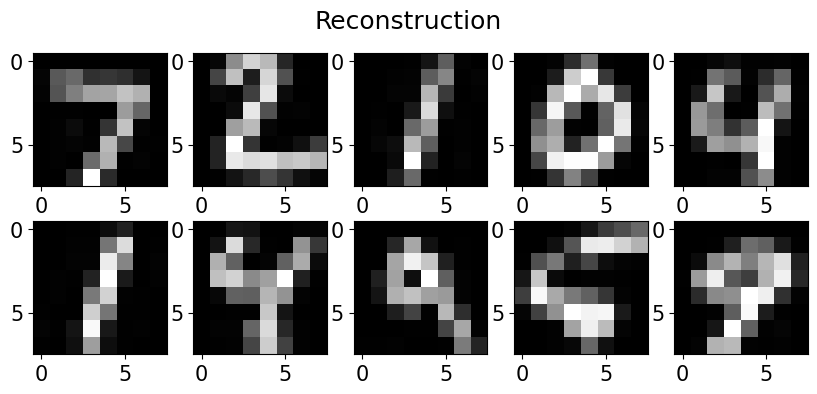

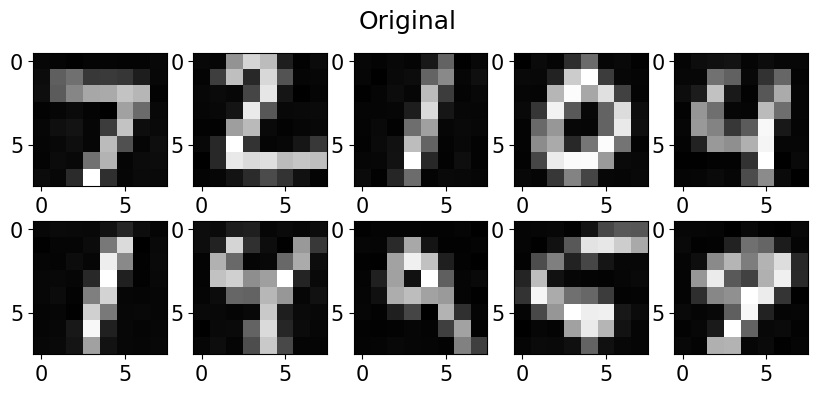

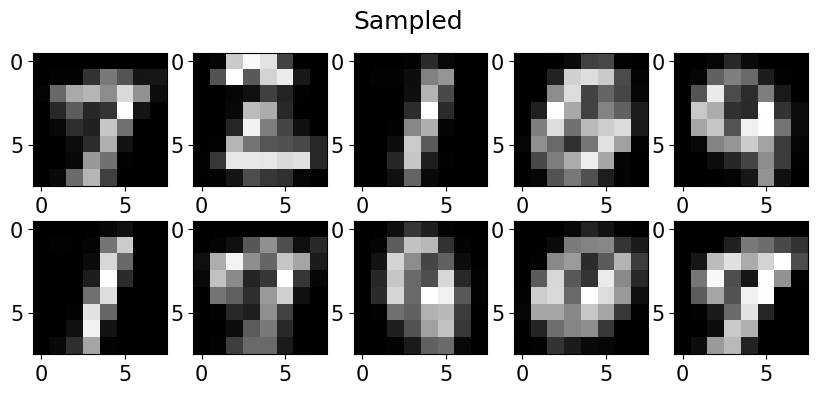

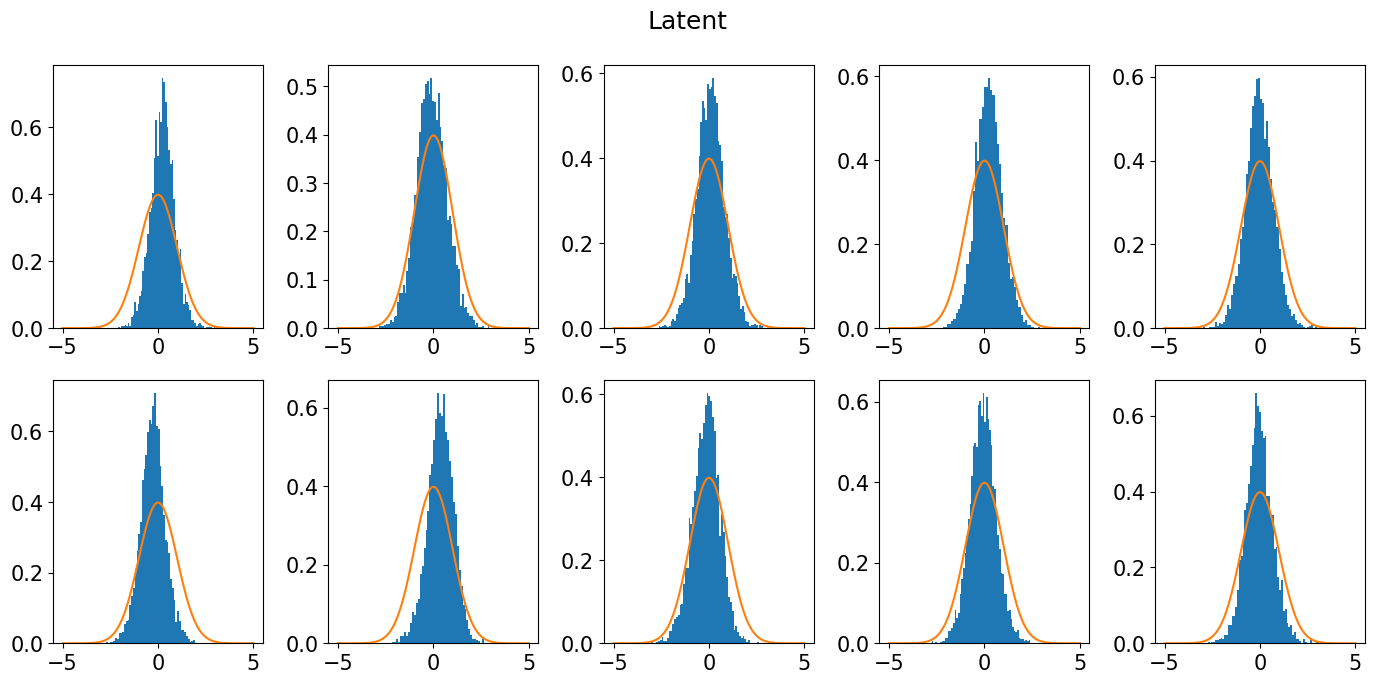

In [43]:
save = False
plot_dir = "ae5/533_mask"
data = plot_mnist(model)
z_test = data["test_z"]
std_z0 = torch.std(z_test[:,0])
print("main detail standard deviation: ", std_z0)
latent_dim = data["test_c"].shape[1]

tensor(0.2747)
0.018508701026439665
[0.0079694] tensor([0.0188])
tensor(0.1481)
0.045942044258117674
[0.01039604] tensor([0.0094])
tensor(0.2725)
0.03026767373085022
[0.00747629] tensor([0.0188])
tensor(0.1246)
0.02097214460372925
[0.00734178] tensor([0.0127])
tensor(0.1976)
0.025805574655532838
[0.00927871] tensor([0.0155])


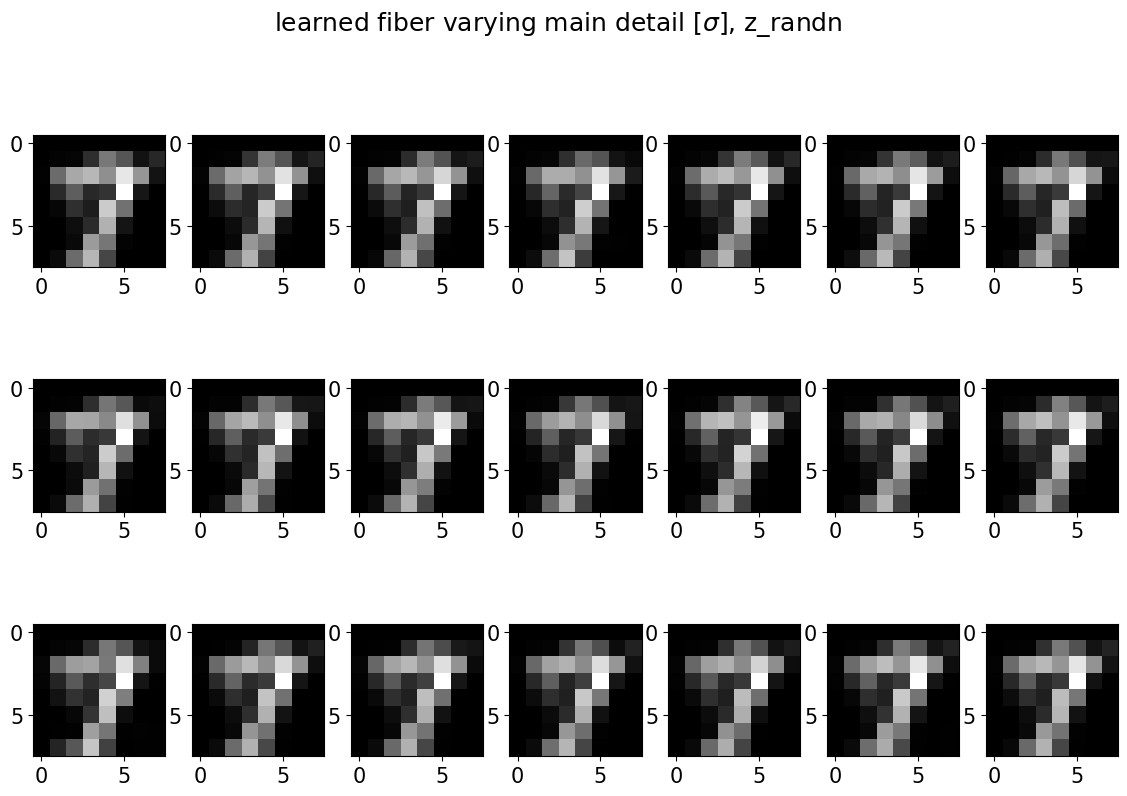

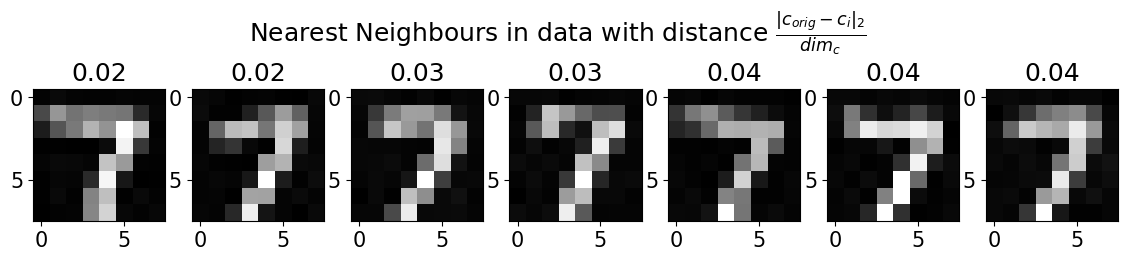

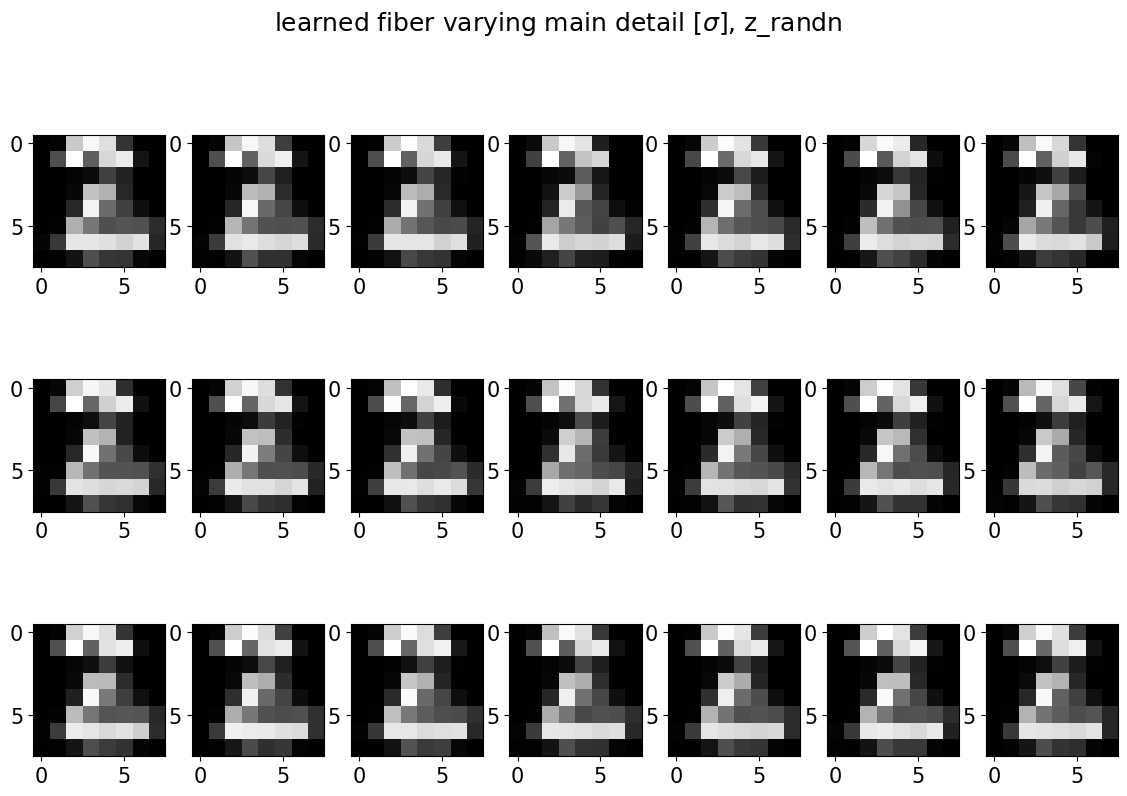

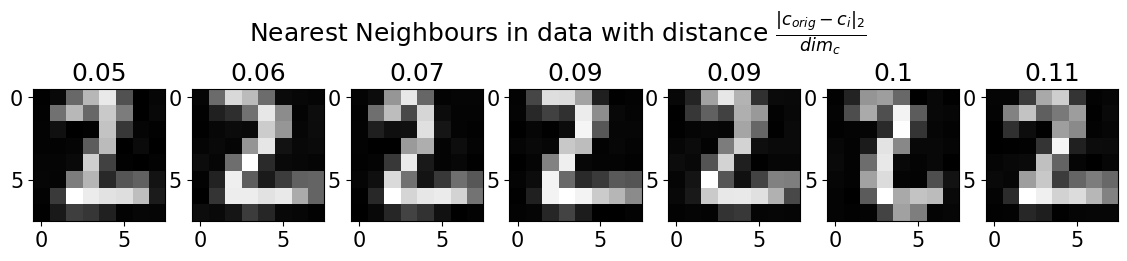

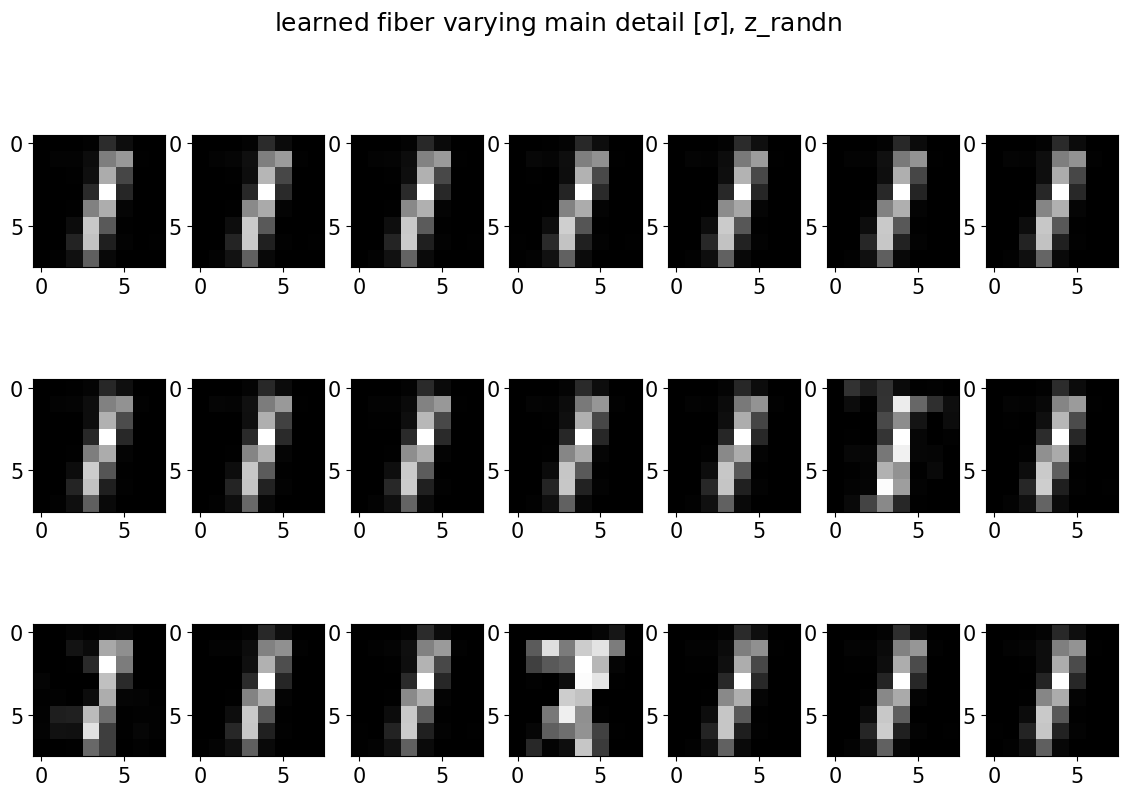

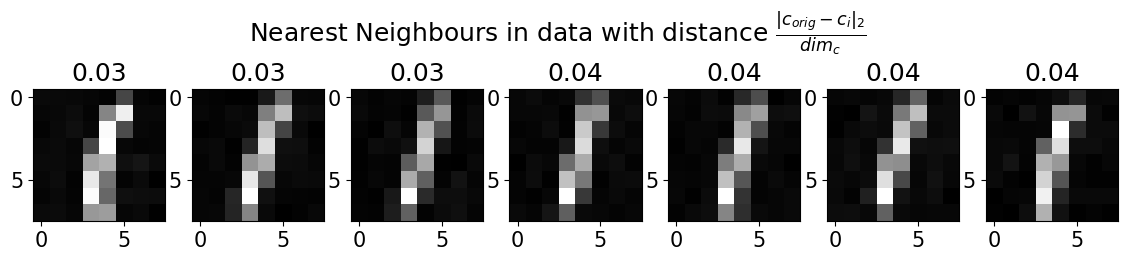

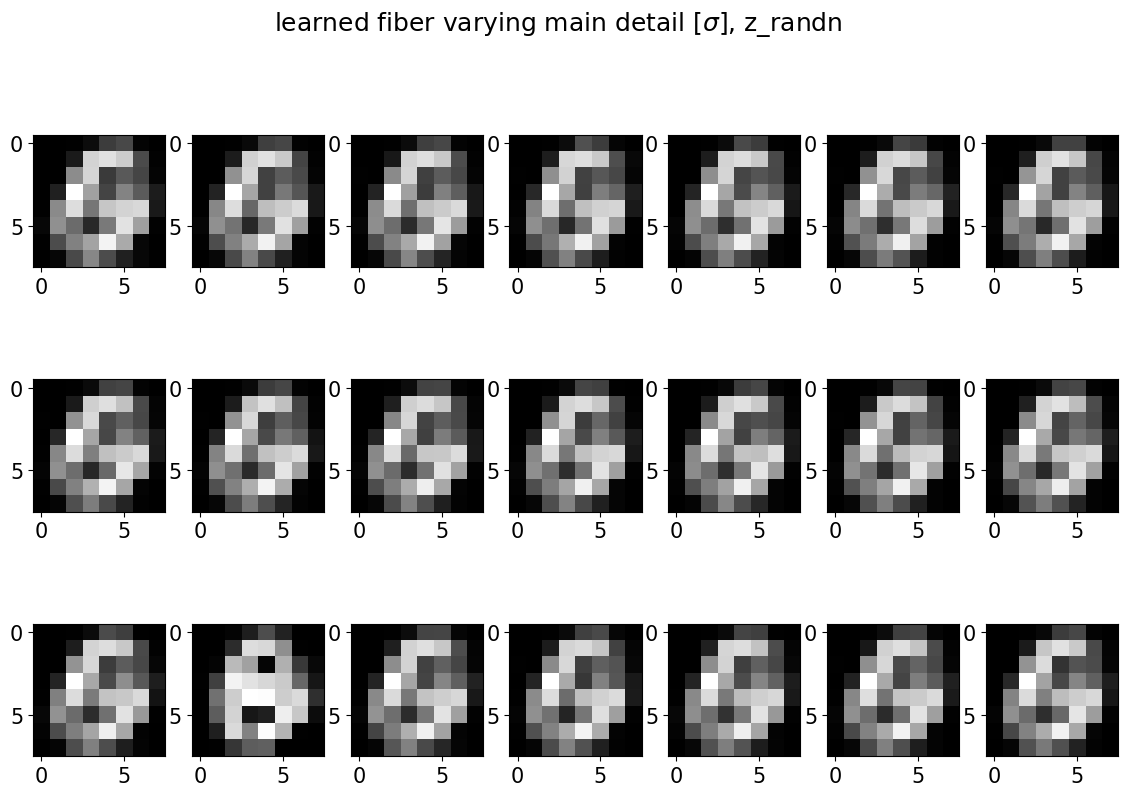

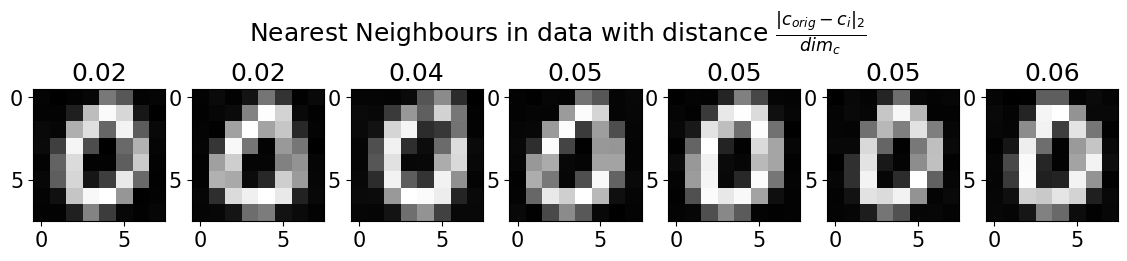

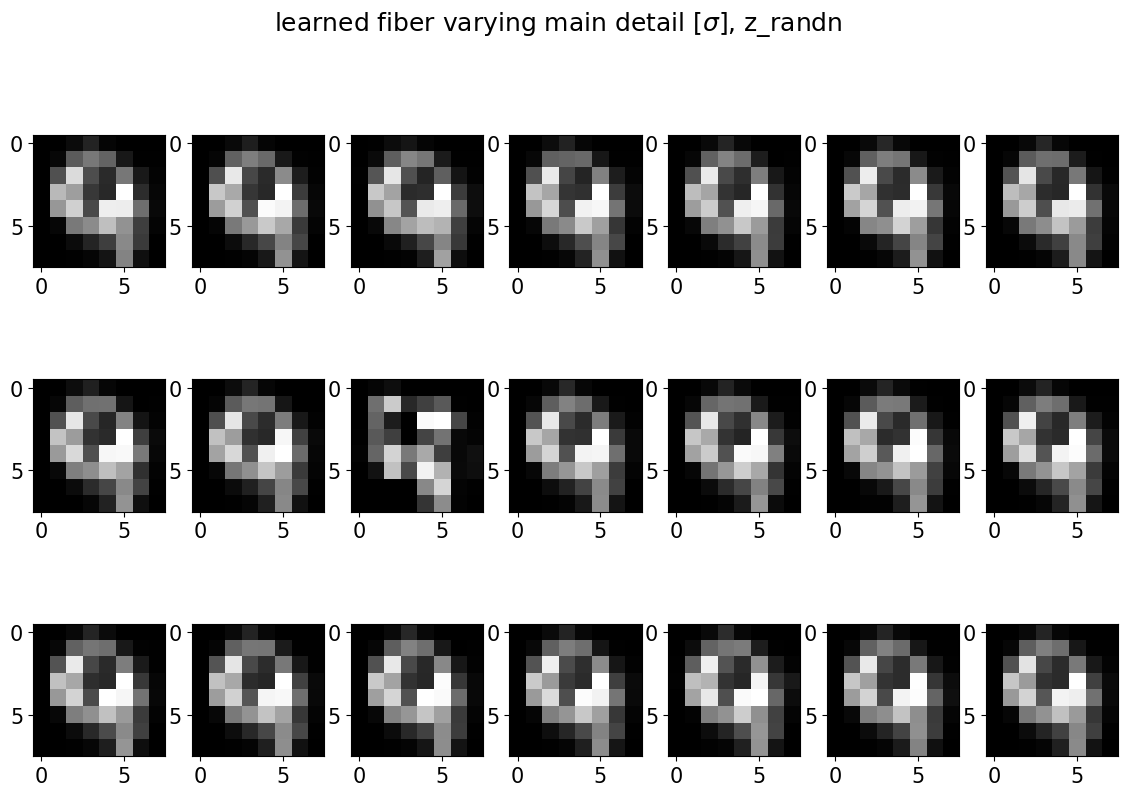

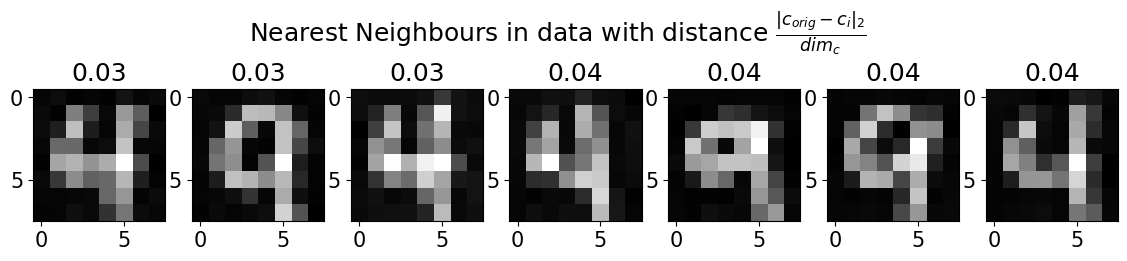

In [46]:
zrange = 5*std_z0
matplotlib.rcParams.update({'font.size': 15})
nums = [7,2,1,0,4]

for j in range(5):
    x_norm, c_sample, NN = plot_details(model, data, j, zrange)
    if classifier == False:
        conditioned = GT.apply_conditions((x_norm,))
        c = conditioned.condition
        x = conditioned.x0
        check_fiber = (GT.encode(x.to(GT.device), c.to(GT.device)).cpu() - center) / std
    else:
        conditioned = GT.apply_conditions((xi,c_sample))
        x = conditioned.x0
        c = torch.empty((x.shape[0], 0), device=x.device, dtype=x.dtype)
        check_fiber = (Features.encode(x.to(GT.device), c.to(GT.device)).cpu() - center) / std
    
    #print(torch.max(check_fiber-c_sample, dim=1)[0])
    delta_coarse = torch.sqrt(torch.sum((check_fiber-c_sample.repeat(512,1))**2, dim=1))/latent_dim
    print(torch.max(delta_coarse))
    print(NN)
    delta_c_std, delta_coarse = torch.std_mean(delta_coarse.reshape(512,-1), dim=0)
    delta_coarse = delta_coarse.numpy()
    print(delta_coarse, delta_c_std)

In [45]:
def plot_details(model2plot, data, sample, zrange):
    nums = [7,2,1,0,4]
    device = model2plot.device
    
    pos_min, pos_max = -zrange, zrange
    c = data["test_c"]
    z = data["test_z"]
    train_c = data["train_c"]
    train_samples = data["train_samples"]
    n = 7

    #calculate two walks along main detail dimension    
    new_details_norm = torch.randn(512,59)
    
    #decoding...
    c_sample = torch.unsqueeze(c[sample], dim=0)
    c_sample_norm = c_sample.repeat(512,1)
    x_details_norm = model2plot.decode(new_details_norm.to(device), c_sample_norm.to(device)).cpu()

    #plotting...    
    fig, axes = plt.subplots(nrows=3, ncols=n, figsize=(14, 9))
    for i in range(3):
        for j in range(n):
            axes[i][j].imshow(x_details_norm[i*n+j].cpu().reshape(8, 8), cmap='gray')
    plt.suptitle(r"learned fiber varying main detail [$\sigma$], z_randn")
    if save:
        plt.savefig(f"plots/{plot_dir}/fiber0/{nums[sample]}fiber_znew.png", bbox_inches='tight')

    verify = c[sample]
    diff = train_c - verify
    squared_diff = torch.sqrt(torch.sum(torch.square(diff), dim =1))
    ind = torch.argsort(squared_diff)[:n]
    #print("squared distance between chosen sample and nearest train samples:", squared_diff[ind]/5)
    similar = train_samples[ind]
    NN = squared_diff[ind[0]].numpy()/latent_dim

    fig, axes = plt.subplots(nrows=1, ncols=n, figsize=(14, 3))
    for i in range(n):
        axes[i].imshow(similar[i].cpu().reshape(8, 8), cmap='gray')
        axes[i].set_title(np.round(squared_diff[ind[i]].numpy()/latent_dim,2))
    fig.suptitle(r"Nearest Neighbours in data with distance $\frac{|c_{orig}-c_i|_2}{dim_c}$")
    if save:
        plt.savefig(f"plots/{plot_dir}/fiber0/{nums[sample]}NN.png", bbox_inches='tight')
    
    return x_details_norm, c_sample, NN

In [10]:
from fff.evaluate.plots import all_conditions
def plot_mnist(model2plt):
    device = model2plt.device
    
    data = {}
    train_batch = model2plt.train_data[:]
    test_batch = model2plt.test_data[:5000]

    train_conditioned = model2plt.apply_conditions(train_batch)
    train_samples = train_conditioned.x0
    train_c = train_conditioned.condition
    
    test_conditioned = model2plt.apply_conditions(test_batch)
    test_c = test_conditioned.condition
    test_samples = test_conditioned.x0
    
    data["train_samples"] = train_samples
    data["test_c"] = test_c
    data["train_c"] = train_c

    #computing...
    print("encoding...")
    batch_size = model2plt.hparams.batch_size
    test_z = torch.cat([
        model2plt.encode(batch.to(device), c_batch.to(device)).cpu()
        for batch, c_batch in zip(test_samples.split(batch_size), test_c.split(batch_size))
    ])
    data["test_z"] = test_z
    
    print("reconstructing...")
    reconstruction = torch.cat([
        model2plt.decode(batch.to(device), c_batch.to(device)).cpu()
        for batch, c_batch in zip(test_z.split(batch_size), test_c.split(batch_size))
    ])
   
    print("sampling...") 
    z_sampled = torch.randn_like(test_z)
    x_sampled = torch.cat([
        model2plt.decode(batch.to(device), c_batch.to(device)).cpu()
        for batch, c_batch in zip(z_sampled.split(batch_size), test_c.split(batch_size))
    ])

    #plotting...
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))
    for i in range(2):
        for j in range(5):
            axes[i][j].imshow(reconstruction[i*5 +j].cpu().reshape(8, 8), cmap='gray')
    fig.suptitle("Reconstruction")
    if save:
        plt.savefig(f"plots/{plot_dir}/reconstruction.png", bbox_inches='tight')
    
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))
    for i in range(2):
        for j in range(5):
            axes[i][j].imshow(test_samples[i*5 +j].cpu().reshape(8, 8), cmap='gray')
    fig.suptitle("Original")
    if save:
        plt.savefig(f"plots/{plot_dir}/original.png", bbox_inches='tight')
    
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))
    for i in range(2):
        for j in range(5):
            axes[i][j].imshow(x_sampled[i*5 +j].cpu().reshape(8, 8), cmap='gray')
    fig.suptitle("Sampled")
    if save:
        plt.savefig(f"plots/{plot_dir}/sampled.png", bbox_inches='tight')

    #sanity check
    if classifier:
        conditioned = GT.apply_conditions((test_samples[:10],torch.zeros((10,0),device=device)))
        x_san = conditioned.x0
        c_emp = torch.empty((x_san.shape[0], 0), device=x_san.device, dtype=x_san.dtype)
        c_san = (Features.encode(x_san.to(GT.device), c_emp.to(GT.device)).cpu()-center)/std
    else:
        conditioned = GT.apply_conditions((test_samples[:10],))
        c_emp = conditioned.condition
        x_san = conditioned.x0
        c_san = (GT.encode(x_san.to(GT.device), c_emp.to(GT.device)).cpu()-center)/std
    sanity = torch.sqrt(torch.sum((c_san-test_c[:10])**2, dim=1)).numpy()/5
    print(sanity)

    
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(14, 7))
    a = np.linspace(-5,5,100)
    for i in range(2):
        for j in range(5):
            axes[i][j].hist(test_z[:,i*5+j], bins=60, label="Samples", density=True)
            axes[i][j].plot(a, normal(a))
    fig.suptitle("Latent")
    fig.tight_layout()
    if save:
        plt.savefig(f"plots/{plot_dir}/latent.png", bbox_inches='tight')

    return data

In [14]:
def normal(x):
    return np.exp(-x**2/2)/np.sqrt(2*np.pi)

In [167]:
Classifier = fff.FreeFormInjectiveFlow.load_from_checkpoint(
        "lightning_logs/classifier/version_4/checkpoints/last.ckpt"
    )

torch.Size([60000, 1, 8, 8])
cond_dim:  0
latent_dim:  10
[10, 256, 256, 10]
[10, 256, 256, 10]
[10, 256, 256, 10]
[10, 256, 256, 10]
[10, 256, 256, 10]
[10, 256, 256, 10]


In [168]:
z = (torch.from_numpy(df["val_y"]) - center) / std
val_data = Classifier.val_data[:]
conditioned = Classifier.apply_conditions(val_data)
t = conditioned.condition
y = np.argmax(t,axis=1)
reducer = umap.UMAP()
embedding = reducer.fit_transform(z)
print(embedding.shape)

(10000, 2)


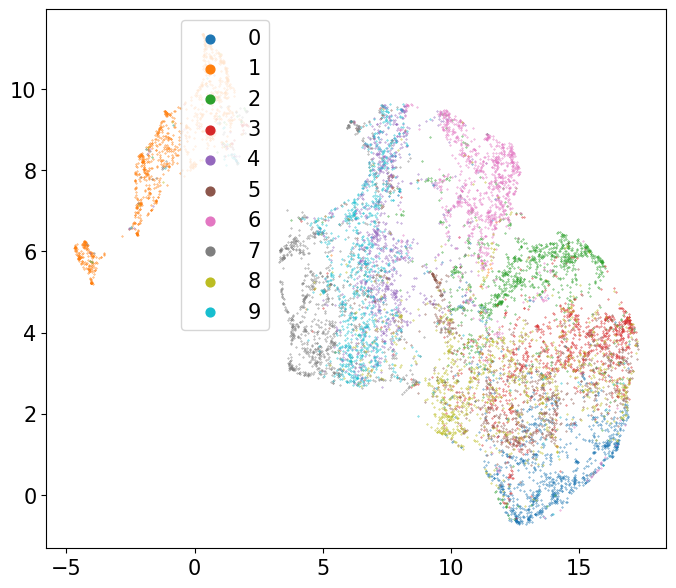

In [169]:
plt.figure(figsize=[8,7])
for i in range(10):
    emb = embedding[y==i]
    plt.scatter(
        emb[:, 0],
        emb[:, 1],
        s=0.1, label=i
    )
plt.legend(markerscale=20.,loc='upper left',bbox_to_anchor=(0.2, 1.))
plt.savefig(f"plots/GTs/AE5/umap_latent.png")

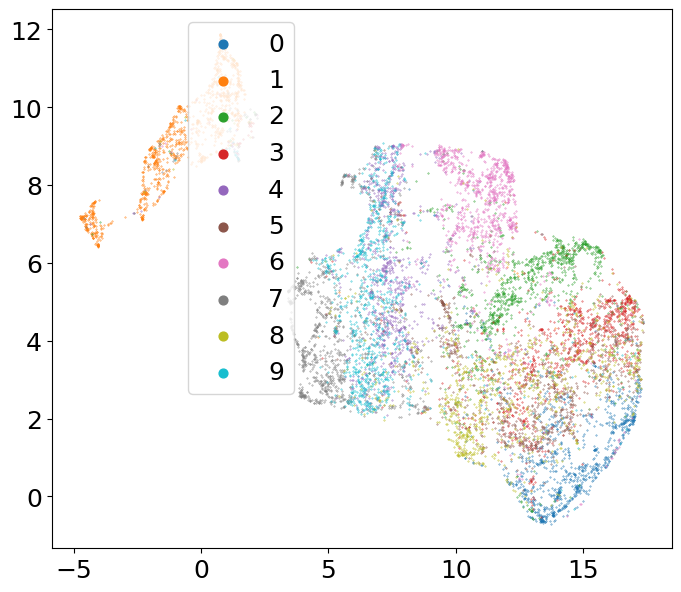

In [19]:
plt.figure(figsize=[8,7])
for i in range(10):
    emb = embedding[y==i]
    plt.scatter(
        emb[:, 0],
        emb[:, 1],
        s=0.1, label=i
    )
plt.legend(markerscale=20.,loc='upper left',bbox_to_anchor=(0.2, 1.))

torch.Size([10000, 10])
torch.Size([10000])


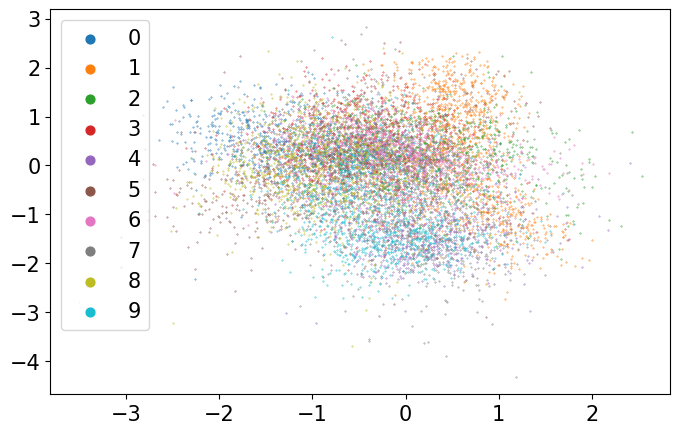

In [30]:
plt.figure(figsize=[8,5])
z = (torch.from_numpy(df["val_y"]) - center) / std
val_data = Classifier.val_data[:]
conditioned = Classifier.apply_conditions(val_data)
t = conditioned.condition
y = np.argmax(t,axis=1)
print(z.shape)
z0 = z[:,6]
z1 = z[:,7]
print(y.shape)
for i in range(10):
    z0i = z0[y==i]
    z1i = z1[y==i]
    plt.scatter(z0i,z1i, s=0.1, label=i)
plt.legend(markerscale=20.)

In [51]:
from fff.model.utils import guess_image_shape
class Truncate(torch.nn.Module):
            def __init__(self):
                super(Truncate, self).__init__()
                enc_conv = list(
                    list(
                    list(
                    list(
                        GT.children()
                    )[1].children()
                    )[0].children()
                    )[0].children()
                    )[0]
                enc_res = list(
                    list(
                    list(
                    list(
                    list(
                        GT.children()
                    )[1].children()
                    )[1].children()
                    )[0].children()
                    )[0].children()
                    )[:-2]
                self.features = torch.nn.Sequential(
                    enc_conv, *enc_res
                )

            def cat_x_c(self, x, c):
                # Reshape as image, and concatenate conditioning as channel dimensions
                has_batch_dimension = len(x.shape) > 1
                if not has_batch_dimension:
                    x = x[None, :]
                    c = c[None, :]
                batch_size = x.shape[0]
                input_shape = guess_image_shape(GT.data_dim)
                x_img = x.reshape(batch_size, *input_shape)
                c_img = c[:, :, None, None] * torch.ones(batch_size, GT.cond_dim, *input_shape[1:], device=c.device)
                out = torch.cat([x_img, c_img], -3).reshape(batch_size, -1)
                if not has_batch_dimension:
                    out = out[0]
                return out
            
            def encode(self, x, c):
                x = self.features(self.cat_x_c(x,c))
                return x

Features = Truncate()

In [7]:
save_data(GT)

encoding traindata...
encoding valdata...
encoding testdata...


In [4]:
def save_data(rectangular_flow):
    train_data = rectangular_flow.train_data[:]
    val_data = rectangular_flow.val_data[:]
    test_data = rectangular_flow.test_data[:]
    
    conditioned = rectangular_flow.apply_conditions(train_data)
    train_samples = conditioned.x_noisy
    c_t = conditioned.condition
    
    conditioned = rectangular_flow.apply_conditions(val_data)
    val_samples = conditioned.x_noisy
    c_v = conditioned.condition

    conditioned = rectangular_flow.apply_conditions(test_data)
    test_samples = conditioned.x_noisy
    c_test = conditioned.condition
    
    device = rectangular_flow.device
    print("encoding traindata...")
    batch_size = rectangular_flow.hparams.batch_size
    z_train = torch.cat([
        rectangular_flow.encode(batch.to(device), c_batch.to(device)).cpu()
        for batch, c_batch in zip(train_samples.split(batch_size), c_t.split(batch_size))
    ])
    print("encoding valdata...")
    z_val = torch.cat([
        rectangular_flow.encode(batch.to(device), c_batch.to(device)).cpu()
        for batch, c_batch in zip(val_samples.split(batch_size), c_v.split(batch_size))
    ])
    print("encoding testdata...")
    z_test = torch.cat([
        rectangular_flow.encode(batch.to(device), c_batch.to(device)).cpu()
        for batch, c_batch in zip(test_samples.split(batch_size), c_test.split(batch_size))
    ])

    data = {}
    
    data["train_x"] = train_samples.cpu().numpy()
    data["train_y"] = z_train.cpu().numpy()
    
    data["val_x"] = val_samples.cpu().numpy()
    data["val_y"] = z_val.cpu().numpy()

    data["test_x"] = test_samples.cpu().numpy()
    data["test_y"] = z_test.cpu().numpy()

    path = "data/"
    fileName = path + 'Mnist_AE_5'
    fileObject = open(fileName, 'wb')
    
    pkl.dump(data, fileObject)
    fileObject.close()